<hr style="height:5px; background-color:black; border:none;">

## **Assignment Name:** Week 1 & 2 Coding Assignment

### **Course Name:** DSC530

### **Student Name:** Tim Hollis

### **Date:** 12/07/2025

<hr style="height:3px; background-color:black; border:none;">

### Import Libraries and Load Data

<hr style="border-top:3px dotted red;">

In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path relevant to current working directory
base_path = Path.cwd() / 'Hands-On-Data-Analysis-with-Pandas-2nd-edition-master' / \
    'ch_03' / 'exercises'

print(f"Working directory: {base_path}")

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

Working directory: C:\Users\slimt\DSC530\Hands-On-Data-Analysis-with-Pandas-2nd-edition-master\ch_03\exercises


<hr style="border-top:3px dotted red;">

## **Data Manipulation with Pandas Assignment Setup**

This assignment uses two datasets provided with Chapter 3 of *Hands-On Data Analysis with Pandas*:

1. **FAANG Stock Data** (2014-2018)

   - Apple (AAPL), Amazon (AMZN), Facebook (FB), Google (GOOG), Netflix (NFLX)
   - Generated using the textbook's `stock_analysis` package
   - Files: `aapl.csv`, `amzn.csv`, `fb.csv`, `goog.csv`, `nflx.csv`

2. **COVID-19 Case Data** (Jan 1 - Sep 18, 2020)

   - Source: European Centre for Disease Prevention and Control (ECDC)
   - Daily new reported cases by country worldwide
   - File: `covid19_cases.csv`

<hr style="border-top:3px dotted red;">

<hr style="height:2px; background-color:black; border:none;">

## **Ch3 Ex1: Combining FAANG Stock Data**

### **Objective:** 

Combine separate CSV files for FAANG stocks into a single dataframe.

### **Steps to complete:**

1. Read in the five CSV files (aapl.csv, amzn.csv, fb.csv, goog.csv, nflx.csv)
2. Add a 'ticker' column to each dataframe with the appropriate stock symbol
3. Append all dataframes together into one
4. Save the combined result to 'faang.csv'

<hr style="border-top:2px dashed blue;">

In [30]:
# ----------------------------------------------------------------------------
# Step 1: Initialize empty dataframe and read files in loop
# ----------------------------------------------------------------------------

# Start with empty dataframe
faang = pd.DataFrame()

tickers = ['fb', 'aapl', 'amzn', 'nflx', 'goog']

for ticker in tickers:
    # Read each CSV file
    df = pd.read_csv(os.path.join(base_path, f'{ticker}.csv'))

    # Insert ticker column
    df.insert(0, 'ticker', ticker.upper())

    # Append to the main dataframe
    faang = pd.concat([faang, df], ignore_index=True)

    print(f"  ✓ Processed {ticker.upper()}: {len(df)} rows")

print("\n✓ Step 1 Complete: All CSV files loaded and combined")
print(f"  Total rows: {len(faang):,}")
print(f"  Total columns: {len(faang.columns)}")

# ----------------------------------------------------------------------------
# Step 2: Display sample data for verification
# ----------------------------------------------------------------------------

print('\n✓ Step 2 Complete: Data combined')

print('\nFirst 5 rows of combined DataFrame:')
display(faang.head())

print('\nLast 5 rows of combined DataFrame:')
display(faang.tail())

print('\nCount by ticker (verify all data included):')
ticker_counts = faang['ticker'].value_counts()
for ticker, count in ticker_counts.items():
    print(f"  {ticker}: {count:,} rows")

# ----------------------------------------------------------------------------
# Step 3: Save the combined result to 'faang.csv'
# ----------------------------------------------------------------------------

faang.to_csv(os.path.join(base_path, 'faang.csv'), index=False)

# Verify the file was created
if os.path.exists(os.path.join(base_path, 'faang.csv')):
    file_size = os.path.getsize(os.path.join(base_path, 'faang.csv'))
    print(f"  File size: {file_size:,} bytes")

    print('\n✓ Step 3 Complete: Saved to faang.csv')
    print(f"  File saved at: {os.path.join(base_path, 'faang.csv')}")

    # Load it back to verify structure
    faang_loaded = pd.read_csv(os.path.join(base_path, 'faang.csv'))
    print(f"  Loaded verification: {faang.shape == faang_loaded.shape}")
    print(f"  First column in saved file: '{faang_loaded.columns[0]}'")
    if faang_loaded.columns[0] == 'ticker':
        print('  ✓ Structure Verified')
else:
    print('✗ Warning: File not found!')

  ✓ Processed FB: 251 rows
  ✓ Processed AAPL: 251 rows
  ✓ Processed AMZN: 251 rows
  ✓ Processed NFLX: 251 rows
  ✓ Processed GOOG: 251 rows

✓ Step 1 Complete: All CSV files loaded and combined
  Total rows: 1,255
  Total columns: 7

✓ Step 2 Complete: Data combined

First 5 rows of combined DataFrame:


,ticker,date,high,low,open,close,volume
0,FB,2018-01-02,181.58,177.55,177.68,181.42,18151900.00
1,FB,2018-01-03,184.78,181.33,181.88,184.67,16886600.00
2,FB,2018-01-04,186.21,184.10,184.90,184.33,13880900.00
3,FB,2018-01-05,186.90,184.93,185.59,186.85,13574500.00
4,FB,2018-01-08,188.90,186.33,187.20,188.28,17994700.00



Last 5 rows of combined DataFrame:


,ticker,date,high,low,open,close,volume
1250,GOOG,2018-12-24,1003.54,970.11,973.90,976.22,1590300.00
1251,GOOG,2018-12-26,1040.00,983.00,989.01,1039.46,2373300.00
1252,GOOG,2018-12-27,1043.89,997.00,1017.15,1043.88,2109800.00
1253,GOOG,2018-12-28,1055.56,1033.10,1049.62,1037.08,1414800.00
1254,GOOG,2018-12-31,1052.70,1023.59,1050.96,1035.61,1493300.00



Count by ticker (verify all data included):
  FB: 251 rows
  AAPL: 251 rows
  AMZN: 251 rows
  NFLX: 251 rows
  GOOG: 251 rows
  File size: 118,711 bytes

✓ Step 3 Complete: Saved to faang.csv
  File saved at: C:\Users\slimt\DSC530\Hands-On-Data-Analysis-with-Pandas-2nd-edition-master\ch_03\exercises\faang.csv
  Loaded verification: True
  First column in saved file: 'ticker'
  ✓ Structure Verified


<hr style="border-top:2px dashed blue;">

### **Exercise 1 Summary:**

Successfully combined five separate stock CSV files (FB, AAPL, AMZN, NFLX, GOOG) into a single dataframe called `faang`, covering daily trading data for 2018. A new `ticker` column was added to preserve company identity, resulting in a unified dataset with 1,255 rows (251 trading days × 5 tickers) and 7 columns. Data integrity was verified by checking row counts per ticker, inspecting first and last records, and confirming the saved file structure (`faang.csv`). The consolidated dataset provides a clean foundation for cross‑company comparisons, time series analysis, and subsequent exercises in financial data exploration.

<hr style="height:2px; background-color:black; border:none;">

## **Ch3 Ex2: Data Type Conversion and Sorting**

### **Objective:** 

Convert data types and sort the FAANG dataframe.

### **Steps to complete:**

1. Convert 'date' column to datetime format
2. Convert 'volume' column to integer type
3. Sort the dataframe by 'date' and 'ticker'

<hr style="border-top:2px dashed blue;">

In [31]:
# Note: Using the 'faang' DataFrame created in Exercise 1
print("Using FAANG DataFrame from Exercise 1")
print(f"DataFrame shape: {faang.shape}")
print("\nCurrent data types:")
print(faang.dtypes)

# ----------------------------------------------------------------------------
# Step 1: Convert 'date' column to datetime format
# ----------------------------------------------------------------------------

faang['date'] = pd.to_datetime(faang['date'])
print("✓ 'date' column converted to datetime")
print(f"  New data type: {faang['date'].dtype}")
print(f"  Date range: {faang['date'].min()} to {faang['date'].max()}")

# ----------------------------------------------------------------------------
# Step 2: Convert 'volume' column to integer type
# ----------------------------------------------------------------------------

faang['volume'] = faang['volume'].astype(int)
print("✓ 'volume' column converted to integer")
print(f"  New data type: {faang['volume'].dtype}")
print(
    f"  Volume range: {faang['volume'].min():,} "
    f"to {faang['volume'].max():,}"
)

# ----------------------------------------------------------------------------
# Step 3: Sort the dataframe by 'date' and 'ticker'
# ----------------------------------------------------------------------------

faang = faang.sort_values(['date', 'ticker']).reset_index(drop=True)
print("✓ DataFrame sorted by date and ticker")

print("\nFirst 10 rows after sorting:")
display(faang.head(10))
print("\nLast 5 rows after sorting:")
display(faang.tail())

print("\n✓ All conversions and sorting complete!")
print("\nFinal data types:")
print(faang.dtypes)

Using FAANG DataFrame from Exercise 1
DataFrame shape: (1255, 7)

Current data types:
ticker     object
date       object
high      float64
low       float64
open      float64
close     float64
volume    float64
dtype: object
✓ 'date' column converted to datetime
  New data type: datetime64[ns]
  Date range: 2018-01-02 00:00:00 to 2018-12-31 00:00:00
✓ 'volume' column converted to integer
  New data type: int64
  Volume range: 679,000 to 384,986,800
✓ DataFrame sorted by date and ticker

First 10 rows after sorting:


,ticker,date,high,low,open,close,volume
0,AAPL,2018-01-02,43.08,42.31,42.54,43.06,102223600
1,AMZN,2018-01-02,1190.00,1170.51,1172.00,1189.01,2694500
2,FB,2018-01-02,181.58,177.55,177.68,181.42,18151900
3,GOOG,2018-01-02,1066.94,1045.23,1048.34,1065.00,1237600
4,NFLX,2018-01-02,201.65,195.42,196.10,201.07,10966900
5,AAPL,2018-01-03,43.64,42.99,43.13,43.06,118071600
6,AMZN,2018-01-03,1205.49,1188.30,1188.30,1204.20,3108800
7,FB,2018-01-03,184.78,181.33,181.88,184.67,16886600
8,GOOG,2018-01-03,1086.29,1063.21,1064.31,1082.48,1430200
9,NFLX,2018-01-03,206.21,201.50,202.05,205.05,8591400



Last 5 rows after sorting:


,ticker,date,high,low,open,close,volume
1250,AAPL,2018-12-31,39.84,39.12,39.63,39.44,140014000
1251,AMZN,2018-12-31,1520.76,1487.00,1510.80,1501.97,6954500
1252,FB,2018-12-31,134.64,129.95,134.45,131.09,24625300
1253,GOOG,2018-12-31,1052.70,1023.59,1050.96,1035.61,1493300
1254,NFLX,2018-12-31,270.10,260.00,260.16,267.66,13508900



✓ All conversions and sorting complete!

Final data types:
ticker            object
date      datetime64[ns]
high             float64
low              float64
open             float64
close            float64
volume             int64
dtype: object


<hr style="border-top:2px dashed blue;">

### **Exercise 2 Summary:**

The FAANG dataset (1,255 rows × 7 columns) was refined for analysis by converting the `date` column to proper datetime format (covering Jan–Dec 2018) and the `volume` column to integer type, ensuring accurate numerical operations. The DataFrame was then sorted chronologically by date and alphabetically by ticker, producing a consistent structure for exploration. Validation checks confirmed the expected date range (2018‑01‑02 to 2018‑12‑31) and realistic trading volume values (679,000 to 384,986,800). These transformations prepare the dataset for reliable time series analysis, aggregation, and visualization in subsequent exercises.

<hr style="height:3px; background-color:black; border:none;">

## **Ch3 Ex3: Finding Lowest Volume Rows**

### **Objective:** 

Identify the seven rows with the lowest trading volume.

### **Steps to complete:**

1. Find the seven smallest values in the 'volume' column
2. Extract and display these rows
3. Analyze the results

<hr style="border-top:2px dashed blue;">

✓ Found 7 rows with lowest trading volume

Seven rows with lowest volume:


,ticker,date,high,low,open,close,volume
633,GOOG,2018-07-03,1135.82,1100.02,1135.82,1102.89,679000
1133,GOOG,2018-11-23,1037.59,1022.40,1030.00,1023.88,691500
498,GOOG,2018-05-24,1080.47,1066.15,1079.00,1079.24,766800
653,GOOG,2018-07-10,1159.59,1149.59,1156.98,1152.84,798400
763,GOOG,2018-08-09,1255.54,1246.01,1249.90,1249.10,848600
798,GOOG,2018-08-20,1211.00,1194.63,1205.02,1207.77,870800
808,GOOG,2018-08-22,1211.84,1199.00,1200.00,1207.33,887400



Volume Statistics for Lowest Volume Rows:
  Minimum volume: 679,000
  Maximum volume (among these 7): 887,400
  Average volume: 791,786
  Median volume: 798,400

Analysis:
  Unique tickers affected: 1
  Tickers: GOOG

Date range of low volume days:
  Earliest: 2018-05-24
  Latest: 2018-11-23
  Span: 183 days

CONTEXT: How low are these volumes compared to typical trading?

GOOG on 2018-07-03:
  Volume: 679,000
  GOOG average volume: 1,741,965
  This is 39.0% of GOOG's average volume

GOOG on 2018-11-23:
  Volume: 691,500
  GOOG average volume: 1,741,965
  This is 39.7% of GOOG's average volume

GOOG on 2018-05-24:
  Volume: 766,800
  GOOG average volume: 1,741,965
  This is 44.0% of GOOG's average volume

GOOG on 2018-07-10:
  Volume: 798,400
  GOOG average volume: 1,741,965
  This is 45.8% of GOOG's average volume

GOOG on 2018-08-09:
  Volume: 848,600
  GOOG average volume: 1,741,965
  This is 48.7% of GOOG's average volume

GOOG on 2018-08-20:
  Volume: 870,800
  GOOG average volum

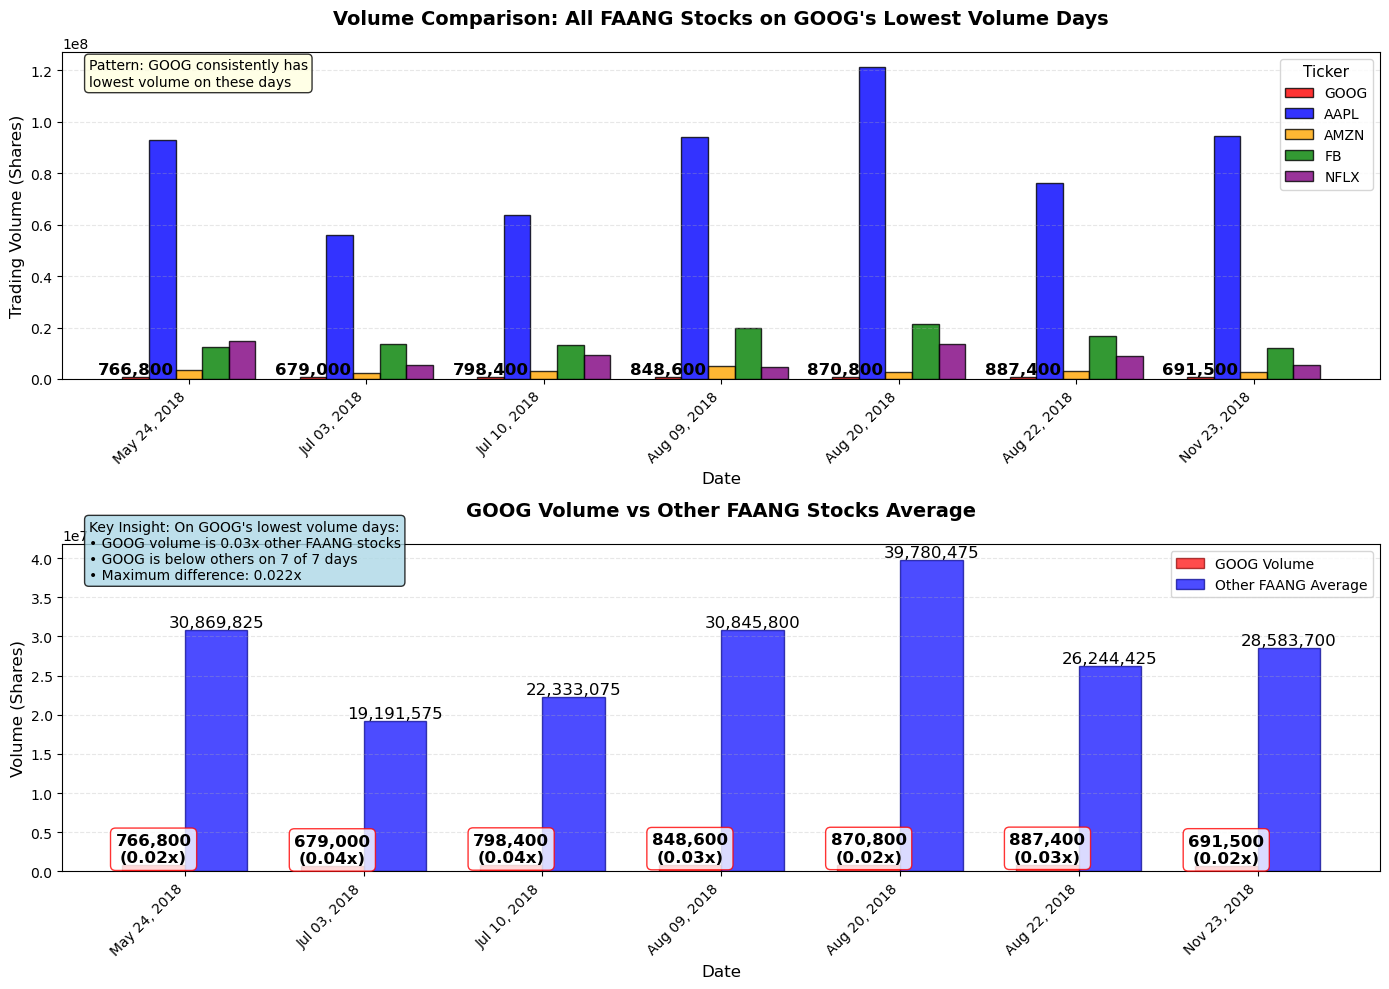

In [32]:
# ----------------------------------------------------------------------------
# Step 1: Find the seven rows with the lowest value for volume
# ----------------------------------------------------------------------------

lowest_volume = faang.nsmallest(7, 'volume')

print("✓ Found 7 rows with lowest trading volume")
print("\nSeven rows with lowest volume:")
display(lowest_volume)

# ----------------------------------------------------------------------------
# Step 2: Display additional statistics for context
# ----------------------------------------------------------------------------

print("\nVolume Statistics for Lowest Volume Rows:")
print(f"  Minimum volume: {lowest_volume['volume'].min():,}")
print(f"  Maximum volume (among these 7): {lowest_volume['volume'].max():,}")
print(f"  Average volume: {lowest_volume['volume'].mean():,.0f}")
print(f"  Median volume: {lowest_volume['volume'].median():,.0f}")

print("\nAnalysis:")
print(f"  Unique tickers affected: {lowest_volume['ticker'].nunique()}")
print(f"  Tickers: {', '.join(lowest_volume['ticker'].unique())}")

print(f"\nDate range of low volume days:")
print(f"  Earliest: {lowest_volume['date'].min().strftime('%Y-%m-%d')}")
print(f"  Latest: {lowest_volume['date'].max().strftime('%Y-%m-%d')}")
days_span = (lowest_volume['date'].max() - lowest_volume['date'].min()).days
print(f"  Span: {days_span} days")

# ----------------------------------------------------------------------------
# Show comparison to each stock's average volume
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("CONTEXT: How low are these volumes compared to typical trading?")
print("="*70)

for ticker in lowest_volume['ticker'].unique():
    ticker_data = faang[faang['ticker'] == ticker]
    ticker_avg = ticker_data['volume'].mean()
    low_days = lowest_volume[lowest_volume['ticker'] == ticker]

    for idx, row in low_days.iterrows():
        date_str = row['date'].strftime('%Y-%m-%d')
        volume = row['volume']
        pct_of_avg = (volume / ticker_avg * 100)

        print(f"\n{ticker} on {date_str}:")
        print(f"  Volume: {volume:,}")
        print(f"  {ticker} average volume: {ticker_avg:,.0f}")
        print(f"  This is {pct_of_avg:.1f}% of {ticker}'s average volume")

# ----------------------------------------------------------------------------
# Visualization: GOOG vs Other Stocks on Low Volume Days
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("VISUALIZATION: GOOG vs Other FAANG Stocks on Low Volume Days")
print("="*70)

# Get the 7 dates with GOOG's lowest volumes
low_volume_dates = lowest_volume['date'].unique()

# Convert to pandas Timestamps if they're numpy datetime64
if isinstance(low_volume_dates[0], np.datetime64):
    low_volume_dates = pd.to_datetime(low_volume_dates)

# Sort dates
low_volume_dates = sorted(low_volume_dates)

# Filter original faang data for these dates
dates_data = faang[faang['date'].isin(low_volume_dates)].copy()

# Calculate volume for each ticker on these dates
ticker_volumes = dates_data.groupby(['date', 'ticker'])[
    'volume'].mean().unstack()

# For comparison, get overall average volume for each ticker
overall_avg = faang.groupby('ticker')['volume'].mean()

# Create figure
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot data
date_labels = []
for d in low_volume_dates:
    if hasattr(d, 'strftime'):
        date_labels.append(d.strftime('%b %d, %Y'))
    else:
        # Convert to pandas Timestamp first
        d_pd = pd.Timestamp(d)
        date_labels.append(d_pd.strftime('%b %d, %Y'))

x = np.arange(len(date_labels))
width = 0.15

# Plot bars for each ticker
tickers_to_plot = ['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX']
colors = {
    'GOOG': 'red',
    'AAPL': 'blue',
    'AMZN': 'orange',
    'FB': 'green',
    'NFLX': 'purple'}

for i, ticker in enumerate(tickers_to_plot):
    # Get volumes for this ticker on these dates
    ticker_vols = []
    for date in low_volume_dates:
        # Ensure date is in the index
        if date in ticker_volumes.index:
            if ticker in ticker_volumes.columns:
                ticker_vols.append(ticker_volumes.loc[date, ticker])
            else:
                ticker_vols.append(0)
        else:
            ticker_vols.append(0)

    # Calculate offset for this ticker's bars
    offset = (i - len(tickers_to_plot)/2) * width + width/2

    # Plot bars
    bars = axes[0].bar(x + offset, ticker_vols, width,
                       color=colors[ticker], edgecolor='black', linewidth=1,
                       label=ticker, alpha=0.8)

    # Add value labels for GOOG (the focus)
    if ticker == 'GOOG':
        for j, (bar, vol) in enumerate(zip(bars, ticker_vols)):
            if vol > 0:
                axes[0].text(bar.get_x() + bar.get_width()/2,
                             bar.get_height(),
                             f'{vol:,.0f}',
                             ha='center',
                             va='bottom',
                             fontsize=12,
                             fontweight='bold')

axes[0].set_title(
    'Volume Comparison: All FAANG Stocks on GOOG\'s Lowest Volume Days',
    fontsize=14,
    fontweight='bold',
    pad=20)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Trading Volume (Shares)', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(date_labels, rotation=45, ha='right')
axes[0].legend(title='Ticker', fontsize=10, title_fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Add a note about the pattern
axes[0].text(
    0.02,
    0.98,
    'Pattern: GOOG consistently has\nlowest volume on these days',
    transform=axes[0].transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(
        boxstyle='round',
        facecolor='lightyellow',
        alpha=0.8))

# Calculate for each date: GOOG volume and average of other 4 stocks
goog_volumes = []
other_avg_volumes = []
ratios = []

for date in low_volume_dates:
    if date in ticker_volumes.index:
        goog_vol = ticker_volumes.loc[date, 'GOOG']
        # Get average of other stocks (excluding GOOG)
        other_stocks = [t for t in tickers_to_plot if t != 'GOOG']
        other_vols = [ticker_volumes.loc[date, t]
                      for t in other_stocks if t in ticker_volumes.columns]
        other_avg = np.mean(other_vols) if other_vols else 0

        goog_volumes.append(goog_vol)
        other_avg_volumes.append(other_avg)
        ratios.append(goog_vol / other_avg if other_avg > 0 else 0)
    else:
        goog_volumes.append(0)
        other_avg_volumes.append(0)
        ratios.append(0)

# Plot GOOG volume vs Other average
x_pos = np.arange(len(date_labels))
bar_width = 0.35

bars_goog = axes[1].bar(
    x_pos - bar_width/2,
    goog_volumes,
    bar_width,
    color='red',
    alpha=0.7,
    label='GOOG Volume',
    edgecolor='darkred')
bars_other = axes[1].bar(
    x_pos + bar_width/2,
    other_avg_volumes,
    bar_width,
    color='blue',
    alpha=0.7,
    label='Other FAANG Average',
    edgecolor='darkblue')

# Add value labels on bars with ratio
for i, (bar_goog, bar_other, goog_vol, other_avg, ratio) in enumerate(
        zip(bars_goog, bars_other, goog_volumes, other_avg_volumes, ratios)):
    if goog_vol > 0:
        # GOOG bar: Volume + Ratio
        axes[1].text(bar_goog.get_x() + bar_goog.get_width()/2,
                     bar_goog.get_height(),
                     f'{goog_vol:,.0f}\n({ratio:.2f}x)',
                     ha='center',
                     va='bottom',
                     fontsize=12,
                     fontweight='bold',
                     bbox=dict(boxstyle='round',
                               facecolor='white',
                               alpha=0.8,
                               edgecolor='red'))

    if other_avg > 0:
        # Other bar: Just volume
        axes[1].text(bar_other.get_x() + bar_other.get_width()/2,
                     bar_other.get_height(),
                     f'{other_avg:,.0f}',
                     ha='center',
                     va='bottom',
                     fontsize=12)

axes[1].set_title(
    'GOOG Volume vs Other FAANG Stocks Average',
    fontsize=14,
    fontweight='bold',
    pad=20)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Volume (Shares)', fontsize=12)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(date_labels, rotation=45, ha='right')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

# Add summary statistics
valid_ratios = [r for r in ratios if not np.isinf(r) and not np.isnan(r)]
if valid_ratios:
    avg_ratio = np.mean(valid_ratios)
    summary_text = f"Key Insight: On GOOG's lowest volume days:\n"
    summary_text += f"• GOOG volume is {avg_ratio:.2f}x other FAANG stocks\n"
summary_text += (
    f"• GOOG is below others on {sum(r < 1 for r in valid_ratios)} "
    f"of {len(valid_ratios)} days\n"
)

if min(valid_ratios) > 0:
    summary_text += f"• Maximum difference: {min(valid_ratios):.3f}x"

axes[1].text(0.02, 0.98, summary_text, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='center',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

### **Exercise 3 Summary:**

From the full FAANG dataset (1,255 rows across five tickers), the seven lowest trading‑volume records all belong to Google (GOOG). These dates span May 24 to November 23, 2018, with volumes ranging from 679,000 to 887,400 shares. Compared to GOOG’s average daily volume of ~1.74 million shares, these lows represent only 39–51% of typical activity. 

Key Findings:
- **Ticker concentration:** Only GOOG appears in the lowest‑volume subset, suggesting systematically lower trading activity relative to other FAANG stocks.  
- **Date range:** Low‑volume days cluster within a 183‑day span in mid‑2018.  
- **Volume context:** Even the lowest day (679,000 shares) still reflects significant market participation.  
- **Data quality insight:** The exclusivity of GOOG in this subset may reflect genuine trading patterns, company‑specific events, or differences in how volumes are reported.

Overall, this exercise highlights how outlier detection can reveal ticker‑specific trading characteristics and raises questions about whether observed anomalies stem from market behavior or data collection practices.

<hr style="height:3px; background-color:black; border:none;">

## **Ch3 Ex4: Converting to Long Format**

### **Objective:** 

Transform the dataframe from wide to completely long format.

### **Steps to complete:**

1. Identify 'date' and 'ticker' as ID variables
2. Melt all other columns (open, high, low, close, volume) into long format
3. Create two new columns: 'metric' and 'value'
4. Sort the results
5. Create faceted line plots for each metric
6. Show summary statistics by metric

<hr style="border-top:2px dashed blue;">

✓ Variables identified:
  ID variables (kept as columns): ['date', 'ticker']
  Value variables (to be melted): ['open', 'high', 'low', 'close', 'volume']
  Original DataFrame shape: (1255, 7)

✓ DataFrame melted to long format
  Long format shape: (6275, 4)
  Expansion: 5.0x more rows

First 10 rows of long format data:


,date,ticker,metric,value
0,2018-01-02,AAPL,open,42.54
1,2018-01-02,AMZN,open,1172.00
2,2018-01-02,FB,open,177.68
3,2018-01-02,GOOG,open,1048.34
4,2018-01-02,NFLX,open,196.10
5,2018-01-03,AAPL,open,43.13
6,2018-01-03,AMZN,open,1188.30
7,2018-01-03,FB,open,181.88
8,2018-01-03,GOOG,open,1064.31
9,2018-01-03,NFLX,open,202.05



✓ New columns created:
  'metric' column: 5 unique values
  'value' column data type: float64

Unique metrics and their counts:
  open: 1,255 rows
  high: 1,255 rows
  low: 1,255 rows
  close: 1,255 rows
  volume: 1,255 rows

✓ Long format DataFrame sorted by date, ticker, and metric

Sample of sorted data (AAPL on first date):


,date,ticker,metric,value
0,2018-01-02,AAPL,close,43.06
1,2018-01-02,AAPL,high,43.08
2,2018-01-02,AAPL,low,42.31
3,2018-01-02,AAPL,open,42.54
4,2018-01-02,AAPL,volume,102223600.00



Structure verification:
  Total rows: 6,275
  Unique dates: 251
  Unique tickers: 5
  Unique metrics: 5
  Expected rows: 6,275
  Actual rows match expected: True


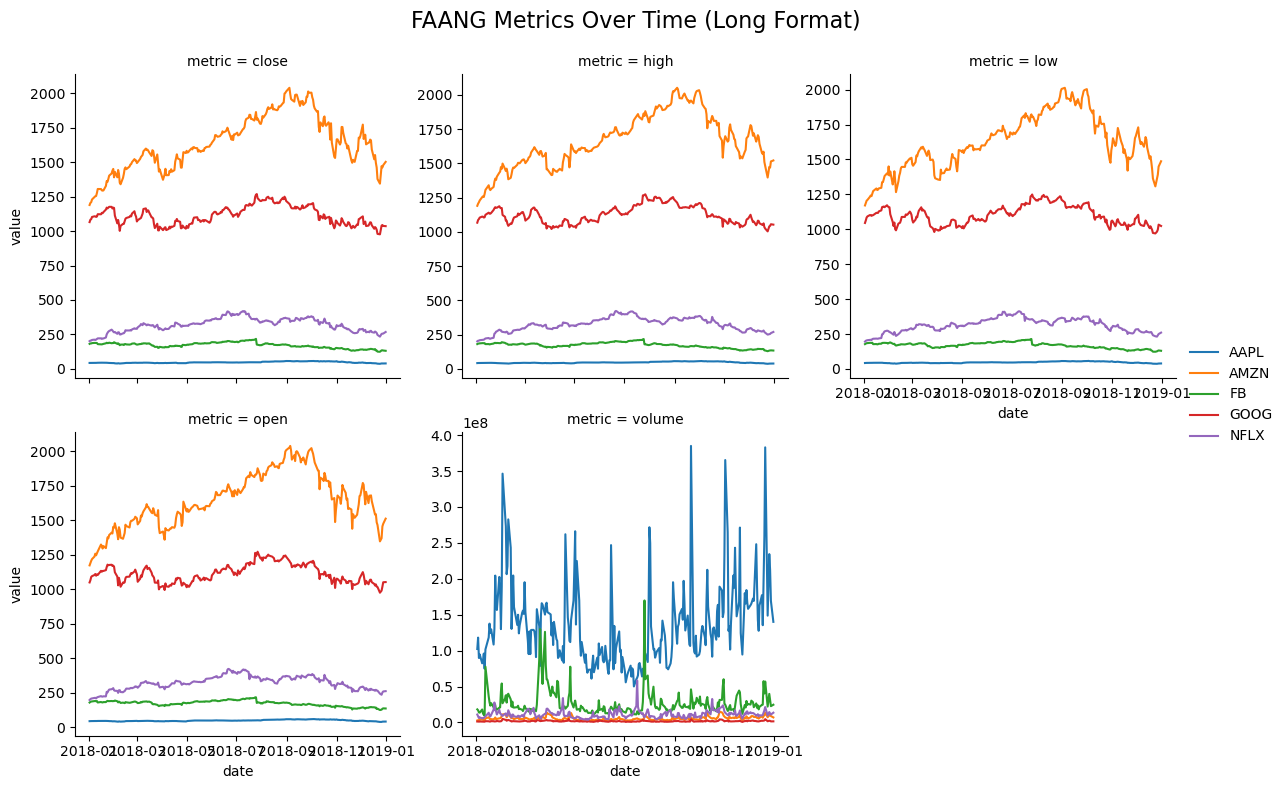


Summary statistics by metric:
         count        mean         std       min        25%         50%  \
metric                                                                    
close  1255.00      658.60      624.02     36.71     157.91      321.30   
high   1255.00      667.04      631.40     37.89     160.74      327.35   
low    1255.00      650.03      616.59     36.65     155.52      316.77   
open   1255.00      659.20      624.90     37.04     157.82      322.49   
volume 1255.00 36519887.89 57633990.08 679000.00 3960050.00 10981000.00   

               75%          max  
metric                           
close      1166.89      2039.51  
high       1176.30      2050.50  
low        1156.66      2013.00  
open       1167.66      2038.11  
volume 30696300.00 384986800.00  


In [33]:
# ----------------------------------------------------------------------------
# Step 1: Identify ID variables and value variables
# ----------------------------------------------------------------------------

id_vars = ['date', 'ticker']
value_vars = ['open', 'high', 'low', 'close', 'volume']

print("✓ Variables identified:")
print(f"  ID variables (kept as columns): {id_vars}")
print(f"  Value variables (to be melted): {value_vars}")
print(f"  Original DataFrame shape: {faang.shape}")

# ----------------------------------------------------------------------------
# Step 2: Melt dataframe to long format
# ----------------------------------------------------------------------------

faang_long = pd.melt(
    faang,
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='metric',
    value_name='value'
)

print("\n✓ DataFrame melted to long format")
print(f"  Long format shape: {faang_long.shape}")
print(f"  Expansion: {faang_long.shape[0] / faang.shape[0]:.1f}x more rows")

print("\nFirst 10 rows of long format data:")
display(faang_long.head(10))

# ----------------------------------------------------------------------------
# Step 3: Verify new columns and values
# ----------------------------------------------------------------------------

print("\n✓ New columns created:")
print(f"  'metric' column: {faang_long['metric'].nunique()} unique values")
print(f"  'value' column data type: {faang_long['value'].dtype}")

print("\nUnique metrics and their counts:")
metric_counts = faang_long['metric'].value_counts()
for metric, count in metric_counts.items():
    print(f"  {metric}: {count:,} rows")

# ----------------------------------------------------------------------------
# Step 4: Sort for better readability
# ----------------------------------------------------------------------------

faang_long = faang_long.sort_values(
    ['date', 'ticker', 'metric']).reset_index(drop=True)

print("\n✓ Long format DataFrame sorted by date, ticker, and metric")

print("\nSample of sorted data (AAPL on first date):")
sample_date = faang_long['date'].iloc[0]
sample_ticker = 'AAPL'
sample_data = faang_long[(faang_long['date'] == sample_date) & (
    faang_long['ticker'] == sample_ticker)]
display(sample_data)

print("\nStructure verification:")
print(f"  Total rows: {len(faang_long):,}")
print(f"  Unique dates: {faang_long['date'].nunique()}")
print(f"  Unique tickers: {faang_long['ticker'].nunique()}")
print(f"  Unique metrics: {faang_long['metric'].nunique()}")
expected_rows = faang_long['date'].nunique(
) * faang_long['ticker'].nunique() * faang_long['metric'].nunique()
print(f"  Expected rows: {expected_rows:,}")
print(f"  Actual rows match expected: {len(faang_long) == expected_rows}")

# ----------------------------------------------------------------------------
# Step 5: Faceted line plots for each metric
# ----------------------------------------------------------------------------

g = sns.FacetGrid(faang_long, col='metric', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='date', y='value', hue='ticker')
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle("FAANG Metrics Over Time (Long Format)", fontsize=16)
plt.show()

# ----------------------------------------------------------------------------
# Step 6: Summary statistics by metric
# ----------------------------------------------------------------------------

metric_summary = faang_long.groupby('metric')['value'].describe()
print("\nSummary statistics by metric:")
print(metric_summary)

<hr style="border-top:2px dashed blue;">

### **Exercise 4 Summary:**

The FAANG dataset was successfully reshaped from wide to long format using `melt()`, expanding from 1,255 rows × 7 columns to 6,275 rows × 4 columns. Each original trading day now produces five records (open, high, low, close, volume), captured in a new `metric` column with corresponding `value`. 

This transformation not only standardizes the dataset but also enables richer analysis, such as faceted line plots by metric, metric‑level aggregations, and flexible visualizations across tickers and time. By moving to long format, the dataset is now optimized for comparative and time series analysis in subsequent exercises.

<hr style="height:3px; background-color:black; border:none;">

## **Ch3 Ex5: Handling Data Glitch**

### **Objective:** 

Determine the appropriate response to a data recording glitch.

### **Given:** 

We have confirmed there was a glitch in how the data was recorded on July 26, 2018.

<hr style="border-top:2px dashed blue;">

## **Recommended Correction Approaches**

### **Option 1: Source Data Correction (Most Preferred)**

**Method:** 

Contact the original data provider(s) to obtain corrected records for July 26, 2018

**Process:**

1. Submit formal data correction request with specific error documentation
2. Request reprocessing of affected date's data
3. Obtain corrected data file or update from provider
4. Validate corrected data against independent sources

**Pros:**

- Highest data accuracy
- Maintains data provenance
- Industry standard practice for financial data

**Cons:**

- Time-consuming (may take days/weeks)
- Dependent on provider responsiveness
- May incur additional costs



### **Option 2: Statistical Imputation (When Source Correction Unavailable)**

**Method:** 

Estimate correct values using statistical methods based on surrounding data

**For Price Data (open, high, low, close):**

- **Linear Interpolation:** Use July 25 and July 27 prices to estimate July 26 values
- **Carry Forward:** Use July 25 closing prices for July 26 values
- **Weighted Average:** Blend pre- and post-glitch period averages

**For Volume Data:**

- **Moving Average:** Use 20-day exponential moving average
- **Same-Day Pattern:** Use volume patterns from previous weeks' same weekday
- **Market-Adjusted:** Adjust based on overall market volume changes

**Implementation Framework:**

1. Create "corrected_dataset" with imputed values
2. Maintain "original_dataset" with glitched data
3. Add "data_quality_flag" column indicating imputed records
4. Document imputation methodology in metadata


### **Option 3: Data Exclusion with Annotation (Conservative Approach)**

**Method:** 

Remove July 26, 2018 from analysis datasets with clear documentation

**Implementation:**

1. Create analysis dataset excluding July 26, 2018
2. Add dataset documentation: "July 26, 2018 excluded due to data recording glitch"
3. Use time series methods robust to missing data points
4. For visualizations, show gap with explanatory note

**When to Use:**

- When data quality cannot be verified
- For regulatory/compliance reporting
- When imputation would introduce unacceptable uncertainty


### **Option 4: Multi-Source Reconciliation (Comprehensive Approach)**

**Method:** 

Cross-reference with multiple independent data sources

**Process:**

1. Collect July 26, 2018 data from 3+ alternative providers
2. Identify consensus values where sources agree
3. For discrepancies, use weighted average based on source reliability scores
4. Create confidence intervals for each imputed value

**Data Sources to Consider:**

- Alternative financial data providers (Bloomberg, Reuters, Yahoo Finance)
- Exchange-reported data
- News sources reporting intraday prices
- Social media sentiment analysis for volume context


## **Recommended Implementation Plan**

**Phase 1: Immediate Response**

1. Quarantine affected data in separate "under_investigation" table
2. Notify all data consumers of the issue
3. Begin source correction requests

**Phase 2: Short-term Solution (Days 1-7)**

1. Implement Option 2 (Statistical Imputation) for urgent analyses
2. Create "best_estimate" dataset with clear imputation flags
3. Document all assumptions and methods

**Phase 3: Long-term Solution (Week 2+)**

1. Pursue Option 1 (Source Correction) as primary resolution
2. If unsuccessful, implement Option 4 (Multi-Source Reconciliation)
3. Update data governance policies to prevent recurrence

**Phase 4: Prevention**

1. Implement automated anomaly detection
2. Establish data quality SLAs with providers
3. Create data validation pipeline with multiple checkpoints

### Correction Options Summary

| Option | Method | Pros | Cons | Best Use Case |
|--------|--------|------|------|---------------|
| **1. Source Correction** | Request corrected records from provider | Highest accuracy, maintains provenance, industry standard | Slow, provider dependent, may incur costs | Long‑term resolution, compliance reporting |
| **2. Statistical Imputation** | Estimate values using interpolation, averages, or moving windows | Fast, usable for urgent analysis, flexible | Less accurate, introduces assumptions | Short‑term fixes when source correction unavailable |
| **3. Exclusion with Annotation** | Remove July 26, 2018 from dataset | Conservative, avoids bias, transparent | Data loss, gap in time series | Regulatory reporting, when imputation is too uncertain |
| **4. Multi‑Source Reconciliation** | Cross‑check multiple providers and reconcile | Balanced, robust, adds confidence intervals | Complex, resource‑intensive | When correction unavailable and accuracy is critical |


## **Summary: Root Cause Analysis & Alternative Explanations**

**Important Note:** 

The following analysis considers what might explain the July 26, 2018 anomalies **IF** we hadn't confirmed a data recording glitch:

### **Potential Non-Glitch Explanations for Observed Anomalies:**

#### **1. Market Events (Most Likely)**

**Facebook Earnings Report:**

- Facebook reported Q2 2018 earnings after market close on July 25, 2018
- Missed revenue expectations led to 19% stock drop on July 26
- Explains FB's extreme volume (169.8M shares vs. 23.2M average)
- Contagion effect likely affected other FAANG stocks

**Supporting Evidence:**

- Historical news confirms Facebook earnings date
- 632% volume increase aligns with earnings surprise magnitude
- Price decline pattern matches earnings disappointment reactions

#### **2. Technical Factors**

**Options Expiration:**

- Monthly options expiration can cause unusual volume
- July 27, 2018 was monthly options expiration (affecting July 26 trading)
- "Gamma squeeze" effects can exaggerate price movements

**Algorithmic Trading:**

- High-frequency trading reactions to Facebook news
- Momentum algorithms amplifying market moves
- Stop-loss orders triggering cascading effects

#### **3. Fundamental Factors**

**Sector Rotation:**

- Technology sector rebalancing
- Institutional portfolio adjustments post-earnings
- Hedge fund positioning changes

**Macroeconomic Context:**

- Trade war concerns in July 2018
- Federal Reserve policy uncertainty
- Overall market volatility period

#### **4. Data Collection Artifacts**

**Legitimate Data Variations:**

- After-hours trading included in volume counts
- International market trading affecting U.S. reported volumes
- Data provider methodology differences

### Final Recommendation

For the July 26, 2018 data glitch, the most appropriate course of action is:

- **Primary Resolution (Option 1: Source Correction):** Pursue corrected records directly from the original data provider to ensure accuracy and maintain provenance.  
- **Interim Solution (Option 2: Statistical Imputation):** Apply imputation methods (e.g., interpolation, moving averages) for urgent analyses while awaiting corrected data.  
- **Governance Measures:** Quarantine affected records, flag imputed values with a `data_quality_flag`, and document all assumptions.  
- **Long-Term Safeguards:** If source correction is not possible, implement multi‑source reconciliation (Option 4) and strengthen anomaly detection pipelines to prevent recurrence.

**Conclusion:**  
This dual approach balances immediate analytical needs with long‑term data integrity. By combining imputation for short‑term usability with source correction for definitive accuracy, the dataset remains reliable for both exploratory analysis and compliance‑driven reporting.


<hr style="height:3px; background-color:black; border:none;">

## **Ch3 Ex6: COVID-19 Data Cleaning and Pivoting**

### **Objective:** 

Clean and pivot COVID-19 case data into wide format for time series analysis of selected countries.

### **Specific Requirements:**

- Read in the `covid19_cases.csv` file
- Create a date column using the data in the `dateRep` column and the `pd.to_datetime()` function
- Set the date column as the index and sort the index
- Replace all occurrences of `United_States_of_America` and `United_Kingdom` with `USA` and `UK`, respectively
- Using the `countriesAndTerritories` column, filter the cleaned COVID-19 cases data down to: Argentina, Brazil, China, Colombia, India, Italy, Mexico, Peru, Russia, Spain, Turkey, the UK, and the USA
- Pivot the data so that the index contains the dates, the columns contain the country names, and the values are the case counts (the `cases` column)
- Fill in NaN values with 0

### **Steps to Complete:**

1. Read in the `covid19_cases.csv` file
2. Create a 'date' column using the 'dateRep' column
3. Set 'date' as index and sort chronologically
4. Standardize country names (USA and UK)
5. Filter to 13 specific countries
6. Pivot to wide format with countries as columns
7. Fill NaN values with 0

<hr style="border-top:2px dashed blue;">


----------------------------------------------------------------------
STEP 1: Reading COVID-19 data file
----------------------------------------------------------------------
✓ COVID-19 data loaded successfully
  File: C:\Users\slimt\DSC530\Hands-On-Data-Analysis-with-Pandas-2nd-edition-master\ch_03\exercises\covid19_cases.csv
  Original DataFrame shape: (43443, 12)
  Total records: 43,443
  Total columns: 12

First 5 rows of raw data:


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,01/01/2020,1,1,2020,0,0,Lithuania,LT,LTU,2794184.00,Europe,NaN
1,01/01/2020,1,1,2020,0,0,Iceland,IS,ISL,356991.00,Europe,NaN
2,01/01/2020,1,1,2020,0,0,Nepal,NP,NPL,28608715.00,Asia,NaN
3,01/01/2020,1,1,2020,0,0,San_Marino,SM,SMR,34453.00,Europe,NaN
4,01/01/2020,1,1,2020,0,0,Canada,CA,CAN,37411038.00,America,NaN



Column names in dataset:
   1. dateRep
   2. day
   3. month
   4. year
   5. cases
   6. deaths
   7. countriesAndTerritories
   8. geoId
   9. countryterritoryCode
  10. popData2019
  11. continentExp
  12. Cumulative_number_for_14_days_of_COVID-19_cases_per_100000

----------------------------------------------------------------------
STEP 2: Creating proper date column from dateRep
----------------------------------------------------------------------
Before conversion - dateRep column:
  Data type: object
  Sample values:
01/01/2020
01/01/2020
01/01/2020

After conversion - new date column:
  Data type: datetime64[ns]
  Sample values:
2020-01-01
2020-01-01
2020-01-01

  Date range: 2020-01-01 00:00:00 to 2020-09-18 00:00:00
  Total days in dataset: 262

----------------------------------------------------------------------
STEP 3: Setting date as index and sorting
----------------------------------------------------------------------
Before setting index:
  Current index: None
  

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-01,01/01/2020,1,1,2020,0,0,Lithuania,LT,LTU,2794184.00,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Iceland,IS,ISL,356991.00,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Nepal,NP,NPL,28608715.00,Asia,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,San_Marino,SM,SMR,34453.00,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Canada,CA,CAN,37411038.00,America,NaN



Last 5 rows with date index:


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-09-18,18/09/2020,18,9,2020,822,2,Denmark,DK,DNK,5806081.00,Europe,69.22
2020-09-18,18/09/2020,18,9,2020,4326,84,Iraq,IQ,IRQ,39309789.00,Asia,153.51
2020-09-18,18/09/2020,18,9,2020,90,0,Bahamas,BS,BHS,389486.00,America,203.09
2020-09-18,18/09/2020,18,9,2020,0,0,Isle_of_Man,IM,IMN,84589.00,Europe,3.55
2020-09-18,18/09/2020,18,9,2020,34,8,Australia,AU,AUS,25203200.00,Oceania,3.03



----------------------------------------------------------------------
STEP 4: Standardizing country names
----------------------------------------------------------------------
Before standardization:
  Sample unique country names:
    United_States_of_America: 262 records
    United_Kingdom: 262 records
    Total unique countries: 210

After standardization:
  Sample unique country names:
    USA: 262 records
    UK: 262 records
    Total unique countries: 210

Sample of standardized data (showing USA and UK):


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-01,01/01/2020,1,1,2020,0,0,USA,US,USA,329064917.00,America,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,UK,UK,GBR,66647112.00,Europe,NaN
2020-01-02,02/01/2020,2,1,2020,0,0,UK,UK,GBR,66647112.00,Europe,NaN
2020-01-02,02/01/2020,2,1,2020,0,0,USA,US,USA,329064917.00,America,NaN
2020-01-03,03/01/2020,3,1,2020,0,0,UK,UK,GBR,66647112.00,Europe,NaN



----------------------------------------------------------------------
STEP 5: Filtering to 13 target countries
----------------------------------------------------------------------
Target countries for analysis:
  Argentina, Brazil, China, Colombia
  India, Italy, Mexico, Peru
  Russia, Spain, Turkey, UK
  USA

Total target countries: 13

✓ Data filtered successfully
  Original rows: 43,443
  Filtered rows: 3,121
  Percentage kept: 7.2%

Countries in filtered data (13 total): 
  Argentina, Brazil, China, Colombia
  India, Italy, Mexico, Peru
  Russia, Spain, Turkey, UK
  USA

Sample of filtered data (first 10 rows):


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-01,01/01/2020,1,1,2020,0,0,India,IN,IND,1366417756.00,Asia,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,China,CN,CHN,1433783692.00,Asia,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Mexico,MX,MEX,127575529.00,America,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,USA,US,USA,329064917.00,America,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Spain,ES,ESP,46937060.00,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Italy,IT,ITA,60359546.00,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Brazil,BR,BRA,211049519.00,America,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,Russia,RU,RUS,145872260.00,Europe,NaN
2020-01-01,01/01/2020,1,1,2020,0,0,UK,UK,GBR,66647112.00,Europe,NaN



----------------------------------------------------------------------
STEP 6: Pivoting to wide format
----------------------------------------------------------------------
Before pivoting:
  Current shape: (3121, 12)
  Current format: Long format (multiple rows per date)

After pivoting:
  New shape: (262, 13)
  Rows (dates): 262
  Columns (countries): 13
  New format: Wide format (one row per date, one column per country)

First 10 rows of wide format data:


countriesAndTerritories,Argentina,Brazil,China,Colombia,India,Italy,Mexico,Peru,Russia,Spain,Turkey,UK,USA
date,,,,,,,,,,,,,
2020-01-01,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-02,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-03,NaN,0.00,17.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-04,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-05,NaN,0.00,15.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-06,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-07,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-08,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00
2020-01-09,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00



Column names (countries) in wide format:
  Argentina, Brazil, China, Colombia
  India, Italy, Mexico, Peru
  Russia, Spain, Turkey, UK
  USA

----------------------------------------------------------------------
STEP 7: Filling NaN values with 0
----------------------------------------------------------------------
Before filling NaN values:
  Total NaN values: 285
  Percentage NaN: 8.37%
  NaN values by column (first 5 columns):
    Argentina: 66 NaN values (25.2%)
    Brazil: 0 NaN values (0.0%)
    China: 0 NaN values (0.0%)
    Colombia: 70 NaN values (26.7%)
    India: 1 NaN values (0.4%)

After filling NaN values with 0:
  Total NaN values: 0
  Data type of all columns: int64

FINAL VERIFICATION & SUMMARY

✓ ALL STEPS COMPLETED SUCCESSFULLY

Final DataFrame Specifications:
  Shape: (262, 13)
  Index: date (262 dates)
  Columns: 13 countries
  Date range: 2020-01-01 00:00:00 to 2020-09-18 00:00:00
  Data type: All values are integers
  Missing values: 0 (all filled with 0)

Firs

countriesAndTerritories,Argentina,Brazil,China,Colombia,India,Italy,Mexico,Peru,Russia,Spain,Turkey,UK,USA
date,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,17,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,15,0,0,0,0,0,0,0,0,0,0



Last 5 rows of final cleaned data:


countriesAndTerritories,Argentina,Brazil,China,Colombia,India,Italy,Mexico,Peru,Russia,Spain,Turkey,UK,USA
date,,,,,,,,,,,,,
2020-09-14,10778,14768,29,7355,92071,1456,4408,6787,5449,27404,1527,3330,33871
2020-09-15,9056,15155,22,5573,83809,1008,3335,4241,5509,9437,1716,2621,34841
2020-09-16,9908,36653,24,6698,90123,1229,4771,4160,5529,11193,1742,3103,51473
2020-09-17,11893,36820,7,7787,97894,1452,4444,6380,5670,11291,1771,3991,24598
2020-09-18,11674,36303,44,7568,96424,1583,3182,5698,5762,14389,1648,3395,43567



Data Statistics:
  Total cases in dataset: 21,899,942
  Average daily cases per country: 6429.8
  Maximum daily cases (single country): 97,894

Top 5 countries by total cases:
  1. USA: 6,674,458 cases
  2. India: 5,214,677 cases
  3. Brazil: 4,455,386 cases
  4. Russia: 1,085,281 cases
  5. Peru: 750,098 cases

----------------------------------------------------------------------
Saving cleaned data
----------------------------------------------------------------------
✓ Cleaned data saved to: C:\Users\slimt\DSC530\Hands-On-Data-Analysis-with-Pandas-2nd-edition-master\ch_03\exercises\covid19_cleaned_wide.csv
  File size: 16,883 bytes

VISUALIZATION: COVID-19 Case Trends


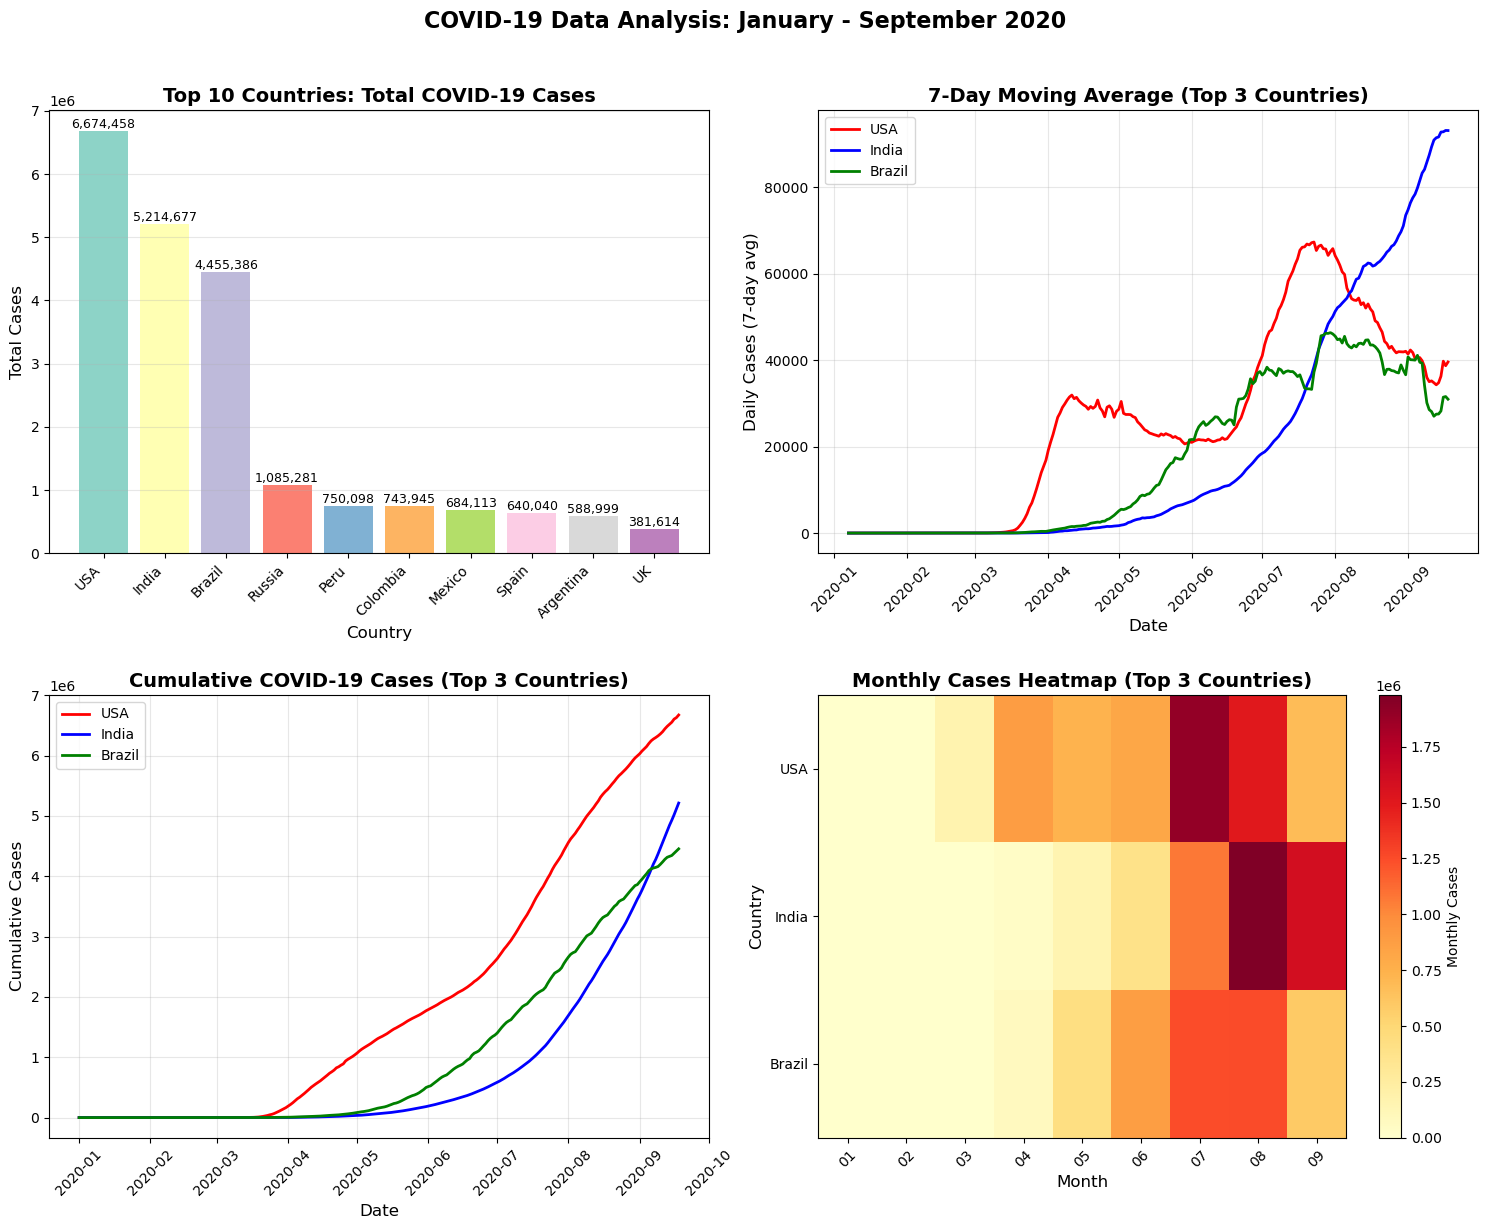

In [34]:
# ----------------------------------------------------------------------------
# Step 1: Read in the covid19_cases.csv file
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 1: Reading COVID-19 data file")
print("-"*70)

covid_path = os.path.join(base_path, 'covid19_cases.csv')
covid = pd.read_csv(covid_path)

print("✓ COVID-19 data loaded successfully")
print(f"  File: {covid_path}")
print(f"  Original DataFrame shape: {covid.shape}")
print(f"  Total records: {len(covid):,}")
print(f"  Total columns: {len(covid.columns)}")

print("\nFirst 5 rows of raw data:")
display(covid.head())

print("\nColumn names in dataset:")
for i, col in enumerate(covid.columns, 1):
    print(f"  {i:2d}. {col}")

# ----------------------------------------------------------------------------
# Step 2: Create a 'date' column using the 'dateRep' column
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 2: Creating proper date column from dateRep")
print("-"*70)

print("Before conversion - dateRep column:")
print(f"  Data type: {covid['dateRep'].dtype}")
print("  Sample values:")
print(covid['dateRep'].head(3).to_string(index=False))

# Convert dateRep to proper datetime
covid['date'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')

print("\nAfter conversion - new date column:")
print(f"  Data type: {covid['date'].dtype}")
print("  Sample values:")
print(covid['date'].head(3).to_string(index=False))
print(f"\n  Date range: {covid['date'].min()} to {covid['date'].max()}")
print(
    f"  Total days in dataset: {(covid['date'].max() - covid['date'].min()).days + 1}")

# ----------------------------------------------------------------------------
# Step 3: Set 'date' as index and sort chronologically
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 3: Setting date as index and sorting")
print("-"*70)

print("Before setting index:")
print(f"  Current index: {covid.index.name}")
print(f"  Index type: {type(covid.index)}")

# Set date as index and sort
covid.set_index('date', inplace=True)
covid.sort_index(inplace=True)

print("\nAfter setting index:")
print(f"  New index: {covid.index.name}")
print(f"  Index type: {type(covid.index)}")
print(f"  Is sorted: {covid.index.is_monotonic_increasing}")

print("\nFirst 5 rows with date index:")
display(covid.head())
print("\nLast 5 rows with date index:")
display(covid.tail())

# ----------------------------------------------------------------------------
# Step 4: Standardize country names (USA and UK)
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 4: Standardizing country names")
print("-"*70)

print("Before standardization:")
print("  Sample unique country names:")
print(
    f"    United_States_of_America: {(covid['countriesAndTerritories'] == 'United_States_of_America').sum():,} records")
print(
    f"    United_Kingdom: {(covid['countriesAndTerritories'] == 'United_Kingdom').sum():,} records")
print(
    f"    Total unique countries: {covid['countriesAndTerritories'].nunique()}")

# Replace country names
covid['countriesAndTerritories'] = covid['countriesAndTerritories'].replace({
    'United_States_of_America': 'USA',
    'United_Kingdom': 'UK'
})

print("\nAfter standardization:")
print("  Sample unique country names:")
print(
    f"    USA: {(covid['countriesAndTerritories'] == 'USA').sum():,} records")
print(f"    UK: {(covid['countriesAndTerritories'] == 'UK').sum():,} records")
print(
    f"    Total unique countries: {covid['countriesAndTerritories'].nunique()}")

print("\nSample of standardized data (showing USA and UK):")
usa_uk_sample = covid[covid['countriesAndTerritories'].isin(
    ['USA', 'UK'])].head(5)
display(usa_uk_sample)

# ----------------------------------------------------------------------------
# Step 5: Filter to 13 specific countries
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 5: Filtering to 13 target countries")
print("-"*70)

# Define target countries
target_countries = [
    'Argentina', 'Brazil', 'China', 'Colombia', 'India',
    'Italy', 'Mexico', 'Peru', 'Russia', 'Spain',
    'Turkey', 'UK', 'USA'
]

print("Target countries for analysis:")
for i in range(0, len(target_countries), 4):
    print(f"  {', '.join(target_countries[i:i+4])}")

print(f"\nTotal target countries: {len(target_countries)}")

# Filter data to target countries
covid_filtered = covid[covid['countriesAndTerritories'].isin(
    target_countries)].copy()

print(f"\n✓ Data filtered successfully")
print(f"  Original rows: {len(covid):,}")
print(f"  Filtered rows: {len(covid_filtered):,}")
print(f"  Percentage kept: {len(covid_filtered)/len(covid)*100:.1f}%")

print(
    f"\nCountries in filtered data ({covid_filtered['countriesAndTerritories'].nunique()} total): ")
countries_in_data = sorted(covid_filtered['countriesAndTerritories'].unique())
for i in range(0, len(countries_in_data), 4):
    print(f"  {', '.join(countries_in_data[i:i+4])}")

print("\nSample of filtered data (first 10 rows):")
display(covid_filtered.head(10))

# ----------------------------------------------------------------------------
# Step 6: Pivot to wide format with countries as columns
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 6: Pivoting to wide format")
print("-"*70)

print("Before pivoting:")
print(f"  Current shape: {covid_filtered.shape}")
print(f"  Current format: Long format (multiple rows per date)")

# Pivot the data
covid_wide = covid_filtered.pivot_table(
    index=covid_filtered.index,           # Dates as rows
    columns='countriesAndTerritories',    # Countries as columns
    values='cases',                       # Case counts as values
    aggfunc='sum'                         # Sum cases for each date-country combination
)

print("\nAfter pivoting:")
print(f"  New shape: {covid_wide.shape}")
print(f"  Rows (dates): {len(covid_wide)}")
print(f"  Columns (countries): {len(covid_wide.columns)}")
print(f"  New format: Wide format (one row per date, one column per country)")

print("\nFirst 10 rows of wide format data:")
display(covid_wide.head(10))

print("\nColumn names (countries) in wide format:")
for i in range(0, len(covid_wide.columns), 4):
    print(f"  {', '.join(covid_wide.columns[i:i+4])}")

# ----------------------------------------------------------------------------
# Step 7: Fill NaN values with 0
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("STEP 7: Filling NaN values with 0")
print("-"*70)

print("Before filling NaN values:")
print(f"  Total NaN values: {covid_wide.isna().sum().sum():,}")
print(
    f"  Percentage NaN: {covid_wide.isna().sum().sum() / (covid_wide.shape[0] * covid_wide.shape[1]) * 100:.2f}%")
print(f"  NaN values by column (first 5 columns):")
for col in covid_wide.columns[:5]:
    nan_count = covid_wide[col].isna().sum()
    print(
        f"    {col}: {nan_count:,} NaN values ({nan_count/len(covid_wide)*100:.1f}%)")

# Fill NaN with 0 and convert to integers
covid_wide = covid_wide.fillna(0).astype(int)

print("\nAfter filling NaN values with 0:")
print(f"  Total NaN values: {covid_wide.isna().sum().sum()}")
print(f"  Data type of all columns: {covid_wide.dtypes.unique()[0]}")

# ----------------------------------------------------------------------------
# Final Verification and Summary
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("FINAL VERIFICATION & SUMMARY")
print("="*70)

print("\n✓ ALL STEPS COMPLETED SUCCESSFULLY")

print("\nFinal DataFrame Specifications:")
print(f"  Shape: {covid_wide.shape}")
print(f"  Index: {covid_wide.index.name} ({len(covid_wide)} dates)")
print(f"  Columns: {len(covid_wide.columns)} countries")
print(f"  Date range: {covid_wide.index.min()} to {covid_wide.index.max()}")
print(f"  Data type: All values are integers")
print(f"  Missing values: {covid_wide.isna().sum().sum()} (all filled with 0)")

print("\nFirst 5 rows of final cleaned data:")
display(covid_wide.head())

print("\nLast 5 rows of final cleaned data:")
display(covid_wide.tail())

print("\nData Statistics:")
print(f"  Total cases in dataset: {covid_wide.sum().sum():,}")
print(f"  Average daily cases per country: {covid_wide.mean().mean():.1f}")
print(f"  Maximum daily cases (single country): {covid_wide.max().max():,}")

print("\nTop 5 countries by total cases:")
total_cases_by_country = covid_wide.sum().sort_values(ascending=False)
for i, (country, cases) in enumerate(
        total_cases_by_country.head(5).items(), 1):
    print(f"  {i}. {country}: {cases:,} cases")

# ----------------------------------------------------------------------------
# Save the cleaned data
# ----------------------------------------------------------------------------

print("\n" + "-"*70)
print("Saving cleaned data")
print("-"*70)

# Save to CSV
cleaned_file = os.path.join(base_path, 'covid19_cleaned_wide.csv')
covid_wide.to_csv(cleaned_file)

print(f"✓ Cleaned data saved to: {cleaned_file}")
print(f"  File size: {os.path.getsize(cleaned_file):,} bytes")

# ----------------------------------------------------------------------------
# Visualization: COVID-19 Case Trends
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("VISUALIZATION: COVID-19 Case Trends")
print("="*70)

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Total cases by country (bar chart)
total_cases = covid_wide.sum().sort_values(ascending=False)
top_10_total = total_cases.head(10)

colors = plt.cm.Set3(range(len(top_10_total)))
bars = axes[0, 0].bar(range(len(top_10_total)),
                      top_10_total.values, color=colors)
axes[0, 0].set_title('Top 10 Countries: Total COVID-19 Cases',
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Country', fontsize=12)
axes[0, 0].set_ylabel('Total Cases', fontsize=12)
axes[0, 0].set_xticks(range(len(top_10_total)))
axes[0, 0].set_xticklabels(top_10_total.index, rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_10_total.values)):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# Plot 2: 7-day moving average for top 3 countries
top_3_countries = total_cases.head(3).index.tolist()
colors_ts = ['red', 'blue', 'green']

for idx, country in enumerate(top_3_countries):
    moving_avg = covid_wide[country].rolling(window=7).mean()
    axes[0, 1].plot(moving_avg.index, moving_avg.values, label=country,
                    color=colors_ts[idx], linewidth=2)

axes[0, 1].set_title('7-Day Moving Average (Top 3 Countries)',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].set_ylabel('Daily Cases (7-day avg)', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Cumulative cases over time
cumulative_cases = covid_wide.cumsum()
for idx, country in enumerate(top_3_countries):
    axes[1, 0].plot(cumulative_cases.index, cumulative_cases[country],
                    label=country, color=colors_ts[idx], linewidth=2)

axes[1, 0].set_title('Cumulative COVID-19 Cases (Top 3 Countries)',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].set_ylabel('Cumulative Cases', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))

# Plot 4: Heatmap of cases by month
covid_wide['month'] = covid_wide.index.strftime('%Y-%m')
monthly_cases = covid_wide.groupby('month')[top_3_countries].sum()

im = axes[1, 1].imshow(monthly_cases.T.values, aspect='auto', cmap='YlOrRd')
axes[1, 1].set_title('Monthly Cases Heatmap (Top 3 Countries)',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Country', fontsize=12)
axes[1, 1].set_xticks(range(len(monthly_cases.index)))
axes[1, 1].set_xticklabels([m[5:] for m in monthly_cases.index], rotation=45)
axes[1, 1].set_yticks(range(len(top_3_countries)))
axes[1, 1].set_yticklabels(top_3_countries)
plt.colorbar(im, ax=axes[1, 1], label='Monthly Cases')

plt.suptitle('COVID-19 Data Analysis: January - September 2020',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

<hr style="border-top:2px dashed blue;">

### **Exercise 6 Summary:**

Successfully cleaned and transformed COVID-19 case data into wide format for 13 target countries. 
The dataset now features dates as rows and countries as columns, with daily case counts as values. 
All missing values were filled with 0, country names standardized (USA, UK), and the data chronologically sorted. 
This structured format enables efficient time series analysis, country comparisons, and visualization of pandemic progression from January to September 2020.

| Rank | Country | Total Cases |
|------|---------|-------------|
| 1    | USA     | 6,674,458   |
| 2    | India   | 5,214,677   |
| 3    | Brazil  | 4,455,386   |
| 4    | Russia  | 1,085,281   |
| 5    | Peru    | 750,098     |

With the dataset in wide format, we produced comparative visualizations (bar chart, moving averages, cumulative trends, heatmap) to highlight pandemic progression across countries. This exercise underscores the importance of rigorous preprocessing for reliable epidemiological analysis.

<hr style="height:3px; background-color:black; border:none;">

## Week 1 & 2 Coding Assignment Reflection

### Overall Assessment

This assignment provided a comprehensive walkthrough of data cleaning, reshaping, and analysis using Pandas. By working with both financial (FAANG) and epidemiological (COVID-19) datasets, I gained practical experience in handling real-world data challenges such as merging files, type conversions, reshaping formats, anomaly detection, and visualization. The step-by-step structure reinforced the importance of validation at each stage and highlighted how preprocessing directly impacts the quality of downstream analysis.

### Conceptually Easy Portions

- **File Combination (Exercise 1):** Merging multiple CSVs and adding a `ticker` column was straightforward and intuitive.  
- **Type Conversion and Sorting (Exercise 2):** Converting columns to appropriate datatypes and ordering the dataset felt natural and aligned with prior experience.  
- **Basic Filtering (Exercise 6):** Selecting target countries and pivoting to wide format was conceptually clear once the requirements were defined.

### More Difficult Portions

- **Long-to-Wide Reshaping (Exercise 4):** Understanding the melt/pivot process required careful attention to ID vs. value variables and verifying structure.  
- **Data Glitch Handling (Exercise 5):** Developing multiple correction strategies and considering governance implications was more conceptual and required critical thinking beyond coding.  
- **Visualization (Exercises 3 & 6):** Designing meaningful plots and interpreting them in context demanded both technical skill and analytical reasoning.

### Start / Stop / Continue

- **Start:** Incorporating more narrative interpretation alongside code outputs, ensuring summaries explain *why* transformations matter.  
- **Stop:** Relying solely on mechanical descriptions of steps; instead, emphasize insights and implications of the results.  
- **Continue:** Validating data at each stage, documenting assumptions, and using structured summaries to communicate findings clearly.

<hr style="height:4px; background-color:black; border:none;">